In [1]:
import pandas
import matplotlib.pyplot as plt

## Utility functions

In [ ]:
# Edit this to match <root_output_dir>/results

RESULTS_DIR = 'results'

In [2]:
def read_result(experiment_name, metric_col_name):
    return pandas.read_csv(f'{RESULTS_DIR}/{experiment_name}/experiment.metrics.csv', usecols=[metric_col_name],
                          squeeze=True).rolling(10).mean()

In [3]:
def plot_range(experiments, ax, plot_start, plot_end, metric_col_name, ylim=None):
    from pathlib import Path
    import numpy as np
        
    for experiment_name, label, alpha, linestyle in experiments:

        line = read_result(experiment_name, metric_col_name)
        line.plot(ax=ax, style=linestyle)

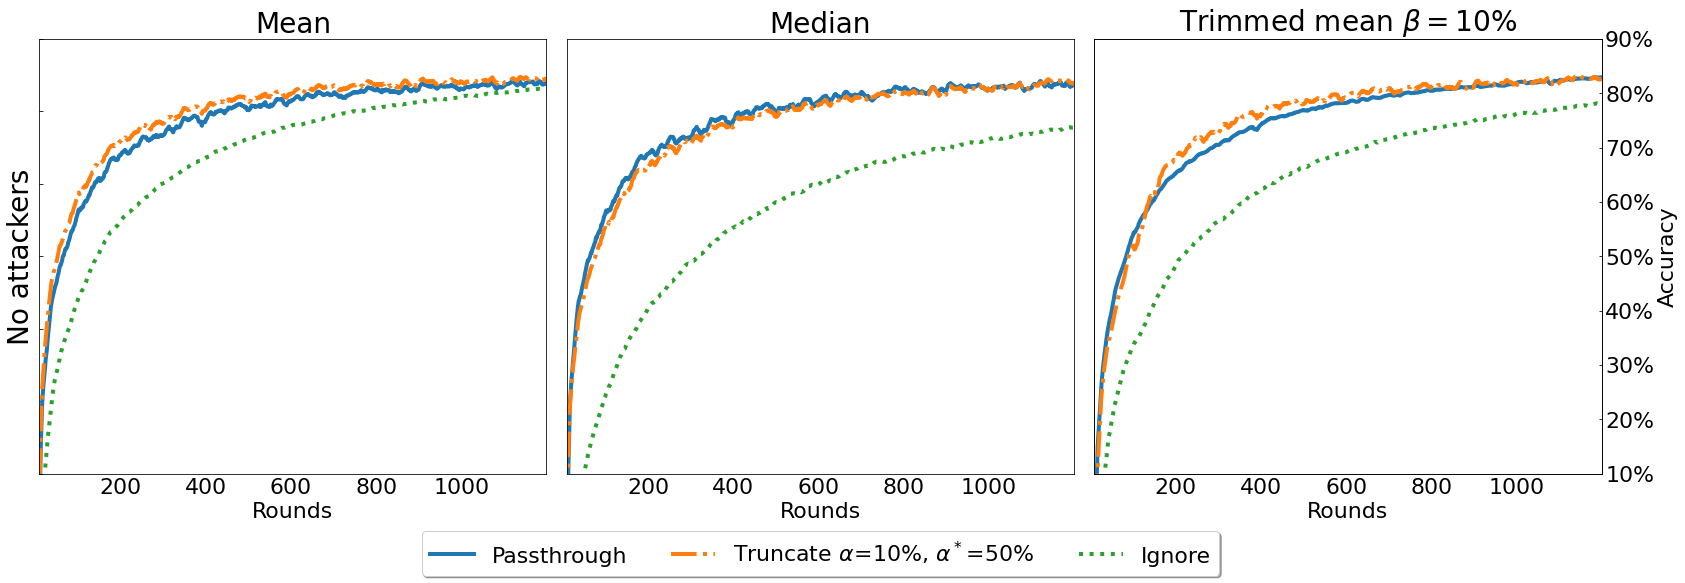

In [4]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
mpl.rcParams['lines.linewidth'] = 4

fig, axs = plt.subplots(1, 3, figsize=(28, 8), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3) = axs

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean $\beta=10\%$')

plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('No attackers')
ax1.set_ylim(0.3, 0.6)

for i in range(3):
    axs[i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[i].set_xticks(range(200, 1200, 200))

# ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

a_l = axs[0]
a_r = axs[2].twinx()
a_r.tick_params(direction="in")
a_r.set_ylim(*a_l.get_ylim())
a_l.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
a_l.tick_params(labelleft=False)

a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
a_r.set_yticks([_ / 10 for _ in range(1, 10)])
    
for i, aggr in enumerate(['mean', 'median', 'tmean']):
    exp1 = [
        (f'shakespeare_{aggr}_passthrough', f'{aggr}[W]',  1, '-'),
        (f'shakespeare_{aggr}_truncate', f'{aggr}[U]', 0.8, '-.'), 
        (f'shakespeare_{aggr}_ignore', f'{aggr}[1]', 0.6, ':'), 
    ]
    plot_range(exp1, axs[i], 0, 800, metric_col_name='eval/accuracy')


color = plt.get_cmap("tab10")(0)
ax2.legend(
           labels=['Passthrough', 'Truncate $\\alpha\\!=\\!10\\%$, $\\alpha^*\\!=\\!50\\%$', 'Ignore'],#r'Truncate $\alpha=10\%$ $\alpha^*=50\%$', 'Ignore'],   # The labels for each line
           loc="lower center",   # Position of legend
     fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=3
           )

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

for ax in [ax1, ax2, ax3]:#, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', length=0)
for ax in [ax2, ax3]:#, ax5, ax6, ax8, ax9]:
    ax.tick_params(axis='y', which='both', length=0)

#fig.savefig('shakespeare_no_attackers.pdf', format='pdf', bbox_inches='tight')

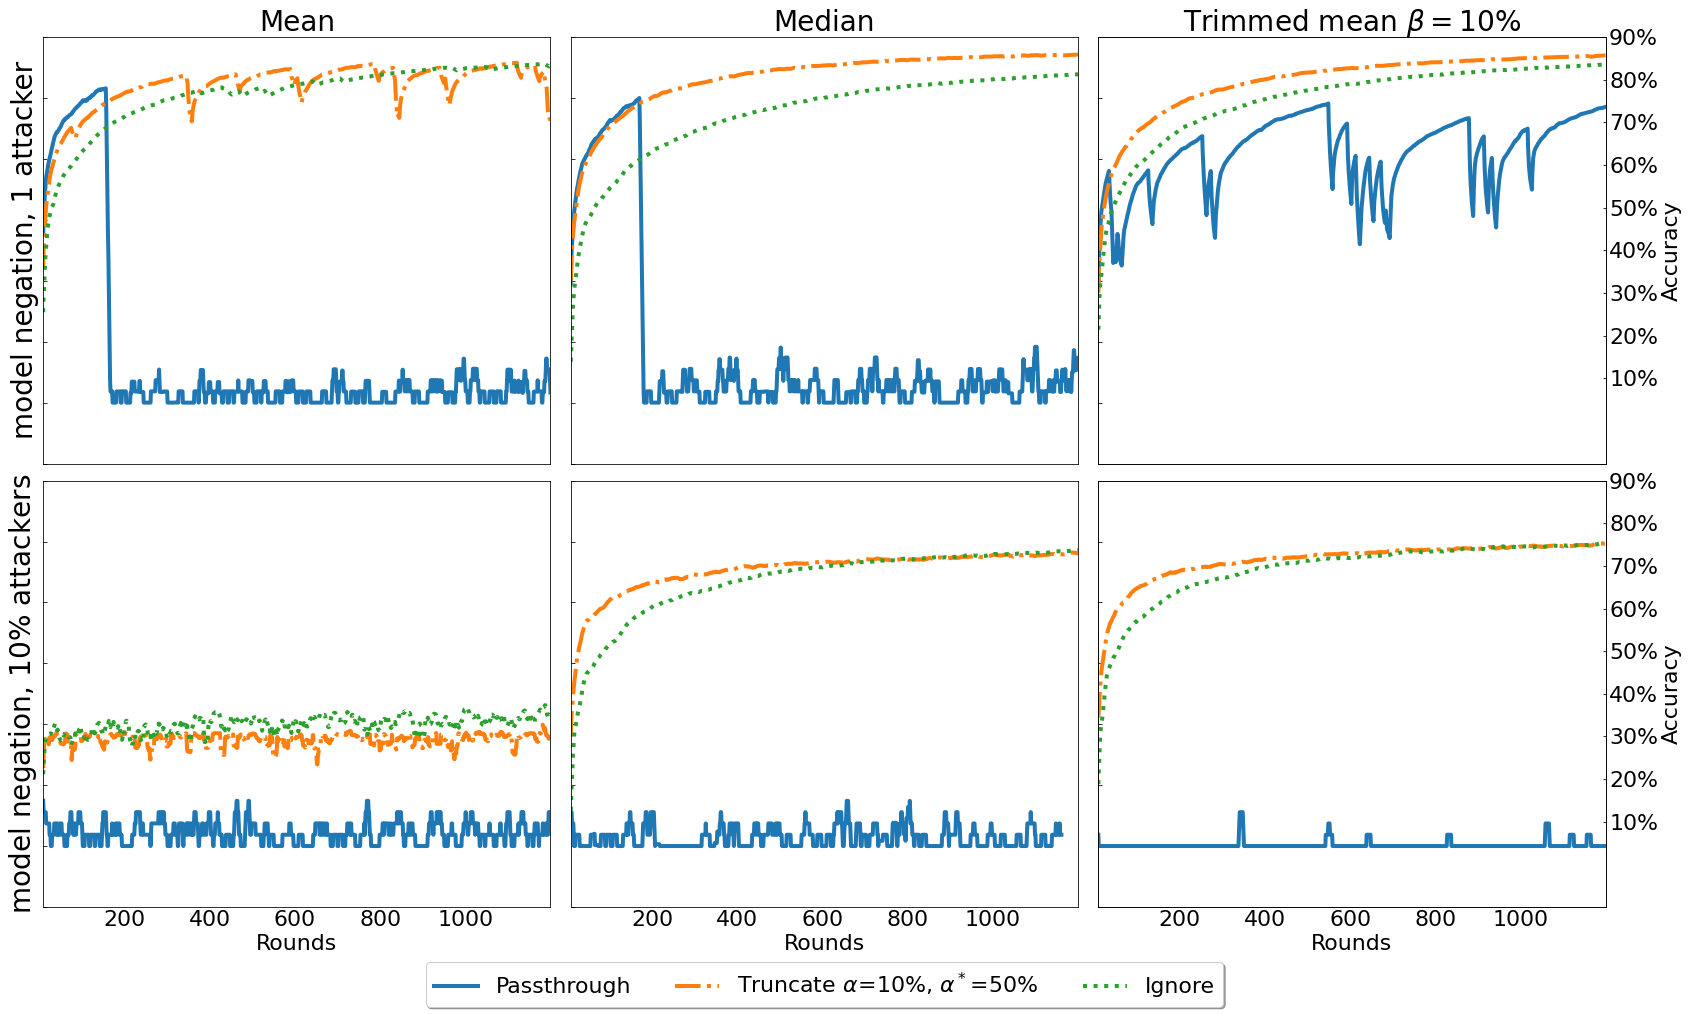

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axs = plt.subplots(2, 3, figsize=(28, 16), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean $\beta=10\%$')

plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('model negation, 1 attacker')
ax1.set_ylim(-0.1, 0.6)

ax4.set_ylabel(r'model negation, $10\%$ attackers')
ax4.set_ylim(-0.1, 0.6)

for i in range(3):
    axs[1][i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[1][i].set_xticks(range(200, 1200, 200))
    
for i in range(2):   
    a_l = axs[i][0]
    a_r = axs[i][2].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])
    
    plt.setp(ax3.get_yticklabels(), visible=True)


for i, aggr in enumerate(['mean', 'median', 'tmean']):
    exp2 = [
        (f'shakespeare_{aggr}_passthrough_byz_d0_single', f'{aggr}[W]',  1, '-'),
        (f'shakespeare_{aggr}_truncate_byz_d0_single', f'{aggr}[U]', 0.8, '-.'), 
        (f'shakespeare_{aggr}_ignore_byz_d0_single', f'{aggr}[1]', 0.6, ':'), 
    ]
    plot_range(exp2, axs[0][i], 0, 800, metric_col_name='eval/accuracy')
    
    exp3 = [
        (f'shakespeare_{aggr}_passthrough_byz_d0', f'{aggr}[W]',  1, '-'),
        (f'shakespeare_{aggr}_truncate_byz_d0', f'{aggr}[U]', 0.8, '-.'), 
        (f'shakespeare_{aggr}_ignore_byz_d0', f'{aggr}[1]', 0.6, ':'), 
    ]
    plot_range(exp3, axs[1][i], 0, 800, metric_col_name='eval/accuracy')

color = plt.get_cmap("tab10")(0)
ax5.legend(
           labels=['Passthrough', 'Truncate $\\alpha\\!=\\!10\\%$, $\\alpha^*\\!=\\!50\\%$', 'Ignore'],
           loc="lower center",   # Position of legend
     fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=3
)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', length=0)

#fig.savefig('shakespeare_model_negation_attack.pdf', format='pdf', bbox_inches='tight')